In [10]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import LineString



In [11]:
suomi_viirs_path = "DATASETS/SUOMI_VIIRS_C2_USA_contiguous_and_Hawaii_24h.csv"
noaa_viirs_path = "DATASETS/J1_VIIRS_C2_USA_contiguous_and_Hawaii_24h.csv"
modis_path = "DATASETS/MODIS_C6_USA_contiguous_and_Hawaii_24h.csv"



Se cargan los CSV

In [12]:
suomi_viirs_data = pd.read_csv(suomi_viirs_path, parse_dates=['acq_date'])
suomi_viirs_data.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,confidence,version,bright_ti5,frp,daynight
0,31.15063,-87.99097,316.7,0.49,0.65,2020-09-26,648,N,nominal,2.0NRT,289.4,2.4,N
1,31.15034,-87.98576,314.1,0.49,0.65,2020-09-26,648,N,nominal,2.0NRT,290.4,2.4,N
2,30.48426,-91.18553,300.2,0.74,0.76,2020-09-26,648,N,nominal,2.0NRT,289.5,2.1,N
3,30.34416,-88.48821,304.4,0.51,0.66,2020-09-26,648,N,nominal,2.0NRT,291.5,1.4,N
4,30.32692,-91.28209,299.0,0.75,0.77,2020-09-26,648,N,nominal,2.0NRT,288.4,1.1,N


In [13]:
noaa_viirs_data = pd.read_csv(noaa_viirs_path, parse_dates=['acq_date'])
noaa_viirs_data.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,confidence,version,bright_ti5,frp,daynight
0,19.60118,-71.01389,323.9,0.40,0.44,2020-09-26,554,1,nominal,2.0NRT,292.9,3.0,N
1,19.52833,-70.73214,306.0,0.38,0.43,2020-09-26,554,1,nominal,2.0NRT,291.6,1.2,N
2,18.92856,-70.35446,338.2,0.54,0.42,2020-09-26,554,1,nominal,2.0NRT,294.6,25.9,N
3,18.00744,-66.65473,304.2,0.39,0.36,2020-09-26,554,1,nominal,2.0NRT,291.9,0.4,N
4,48.18973,-64.92108,298.2,0.41,0.45,2020-09-26,548,1,nominal,2.0NRT,277.2,1.2,N


In [14]:
modis_data = pd.read_csv(modis_path, parse_dates=['acq_date'])
modis_data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,confidence,version,bright_t31,frp,daynight
0,39.884,-78.246,300.3,1.4,1.2,2020-09-26,255,T,24,6.0NRT,284.0,10.4,N
1,18.639,-96.216,308.0,1.4,1.2,2020-09-26,425,T,73,6.0NRT,291.3,10.4,N
2,40.595,-105.702,303.1,1.9,1.4,2020-09-26,435,T,53,6.0NRT,278.5,23.4,N
3,40.696,-105.729,322.6,1.9,1.3,2020-09-26,435,T,77,6.0NRT,283.9,54.7,N
4,40.705,-105.718,321.3,1.9,1.3,2020-09-26,435,T,39,6.0NRT,282.8,49.1,N


Se convierten a archivos geograficos

In [15]:
suomi_viirs_geodata = gpd.GeoDataFrame(suomi_viirs_data, geometry=gpd.points_from_xy(suomi_viirs_data["longitude"], suomi_viirs_data["latitude"]))
suomi_viirs_geodata.crs = {'init': 'epsg:4326'}
suomi_viirs_geodata.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,confidence,version,bright_ti5,frp,daynight,geometry
0,31.15063,-87.99097,316.7,0.49,0.65,2020-09-26,648,N,nominal,2.0NRT,289.4,2.4,N,POINT (-87.99097 31.15063)
1,31.15034,-87.98576,314.1,0.49,0.65,2020-09-26,648,N,nominal,2.0NRT,290.4,2.4,N,POINT (-87.98576 31.15034)
2,30.48426,-91.18553,300.2,0.74,0.76,2020-09-26,648,N,nominal,2.0NRT,289.5,2.1,N,POINT (-91.18553 30.48426)
3,30.34416,-88.48821,304.4,0.51,0.66,2020-09-26,648,N,nominal,2.0NRT,291.5,1.4,N,POINT (-88.48821 30.34416)
4,30.32692,-91.28209,299.0,0.75,0.77,2020-09-26,648,N,nominal,2.0NRT,288.4,1.1,N,POINT (-91.28209 30.32692)


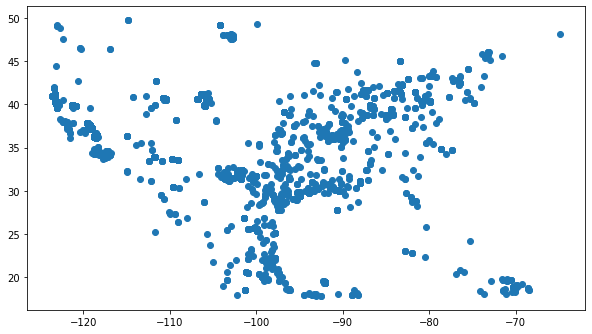

In [17]:
ax = suomi_viirs_geodata.plot(figsize=(10,10))

In [18]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [32]:
m_1 = folium.Map(location=[40,-95], tiles='openstreetmap', zoom_start=4)
m_1

In [35]:
m_2 = folium.Map(location=[40,-95], tiles='openstreetmap', zoom_start=4)

for idx, row in suomi_viirs_geodata.iterrows():
    Marker([row['latitude'], row['longitude']]).add_to(m_2)
    
m_2

In [36]:
m_3 = folium.Map(location=[40,-95], tiles='openstreetmap', zoom_start=4)

HeatMap(data=suomi_viirs_geodata[['latitude', 'longitude']], radius=10).add_to(m_3)
    
m_3